In [ ]:
!pip3 freeze > requirements.txt

In [ ]:
path = '/content/sd.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Library version details

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


#1. Data Extraction

This section imports the necessary Python libraries for data manipulation, visualization, and machine learning. Libraries like pandas, numpy, and matplotlib are imported for data handling and visualization. The scikit-learn library is imported for machine learning algorithms, and seaborn is imported for advanced visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, \
    AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Load your dataset
data = pd.read_csv(path)
data = data.drop(data.columns[0], axis=1)

#2. Data Validation, Cleansing, Aggregation and Representation

Loading the dataset from a CSV file.

Displaying summary statistics of the dataset using the describe() function.

Creating histograms to visualize the distribution of data using the hist() function.

Creating a heatmap to visualize missing data using the sns.heatmap() function.

Removing duplicate rows from the dataset using the drop_duplicates() function.

Computing the count of missing values for each column.

Creating a correlation matrix and displaying it using a heatmap.

In [ ]:
print(data.describe())

                year          month            day           hour  \
count  249023.000000  249023.000000  249023.000000  249023.000000   
mean     2017.710007       6.050694      15.691081      12.536890   
std         0.706113       3.521591       8.787958       6.910254   
min      2017.000000       1.000000       1.000000       1.000000   
25%      2017.000000       3.000000       8.000000       7.000000   
50%      2018.000000       6.000000      16.000000      13.000000   
75%      2018.000000       9.000000      23.000000      19.000000   
max      2019.000000      12.000000      31.000000      24.000000   

              minute           temp           wind      barometer  \
count  249023.000000  249023.000000  249023.000000  248951.000000   
mean        0.131108      24.722624      12.957104    1015.455355   
std         1.970710       8.880913       8.711619       6.970779   
min         0.000000      -4.000000      -1.000000     904.000000   
25%         0.000000      18.0000

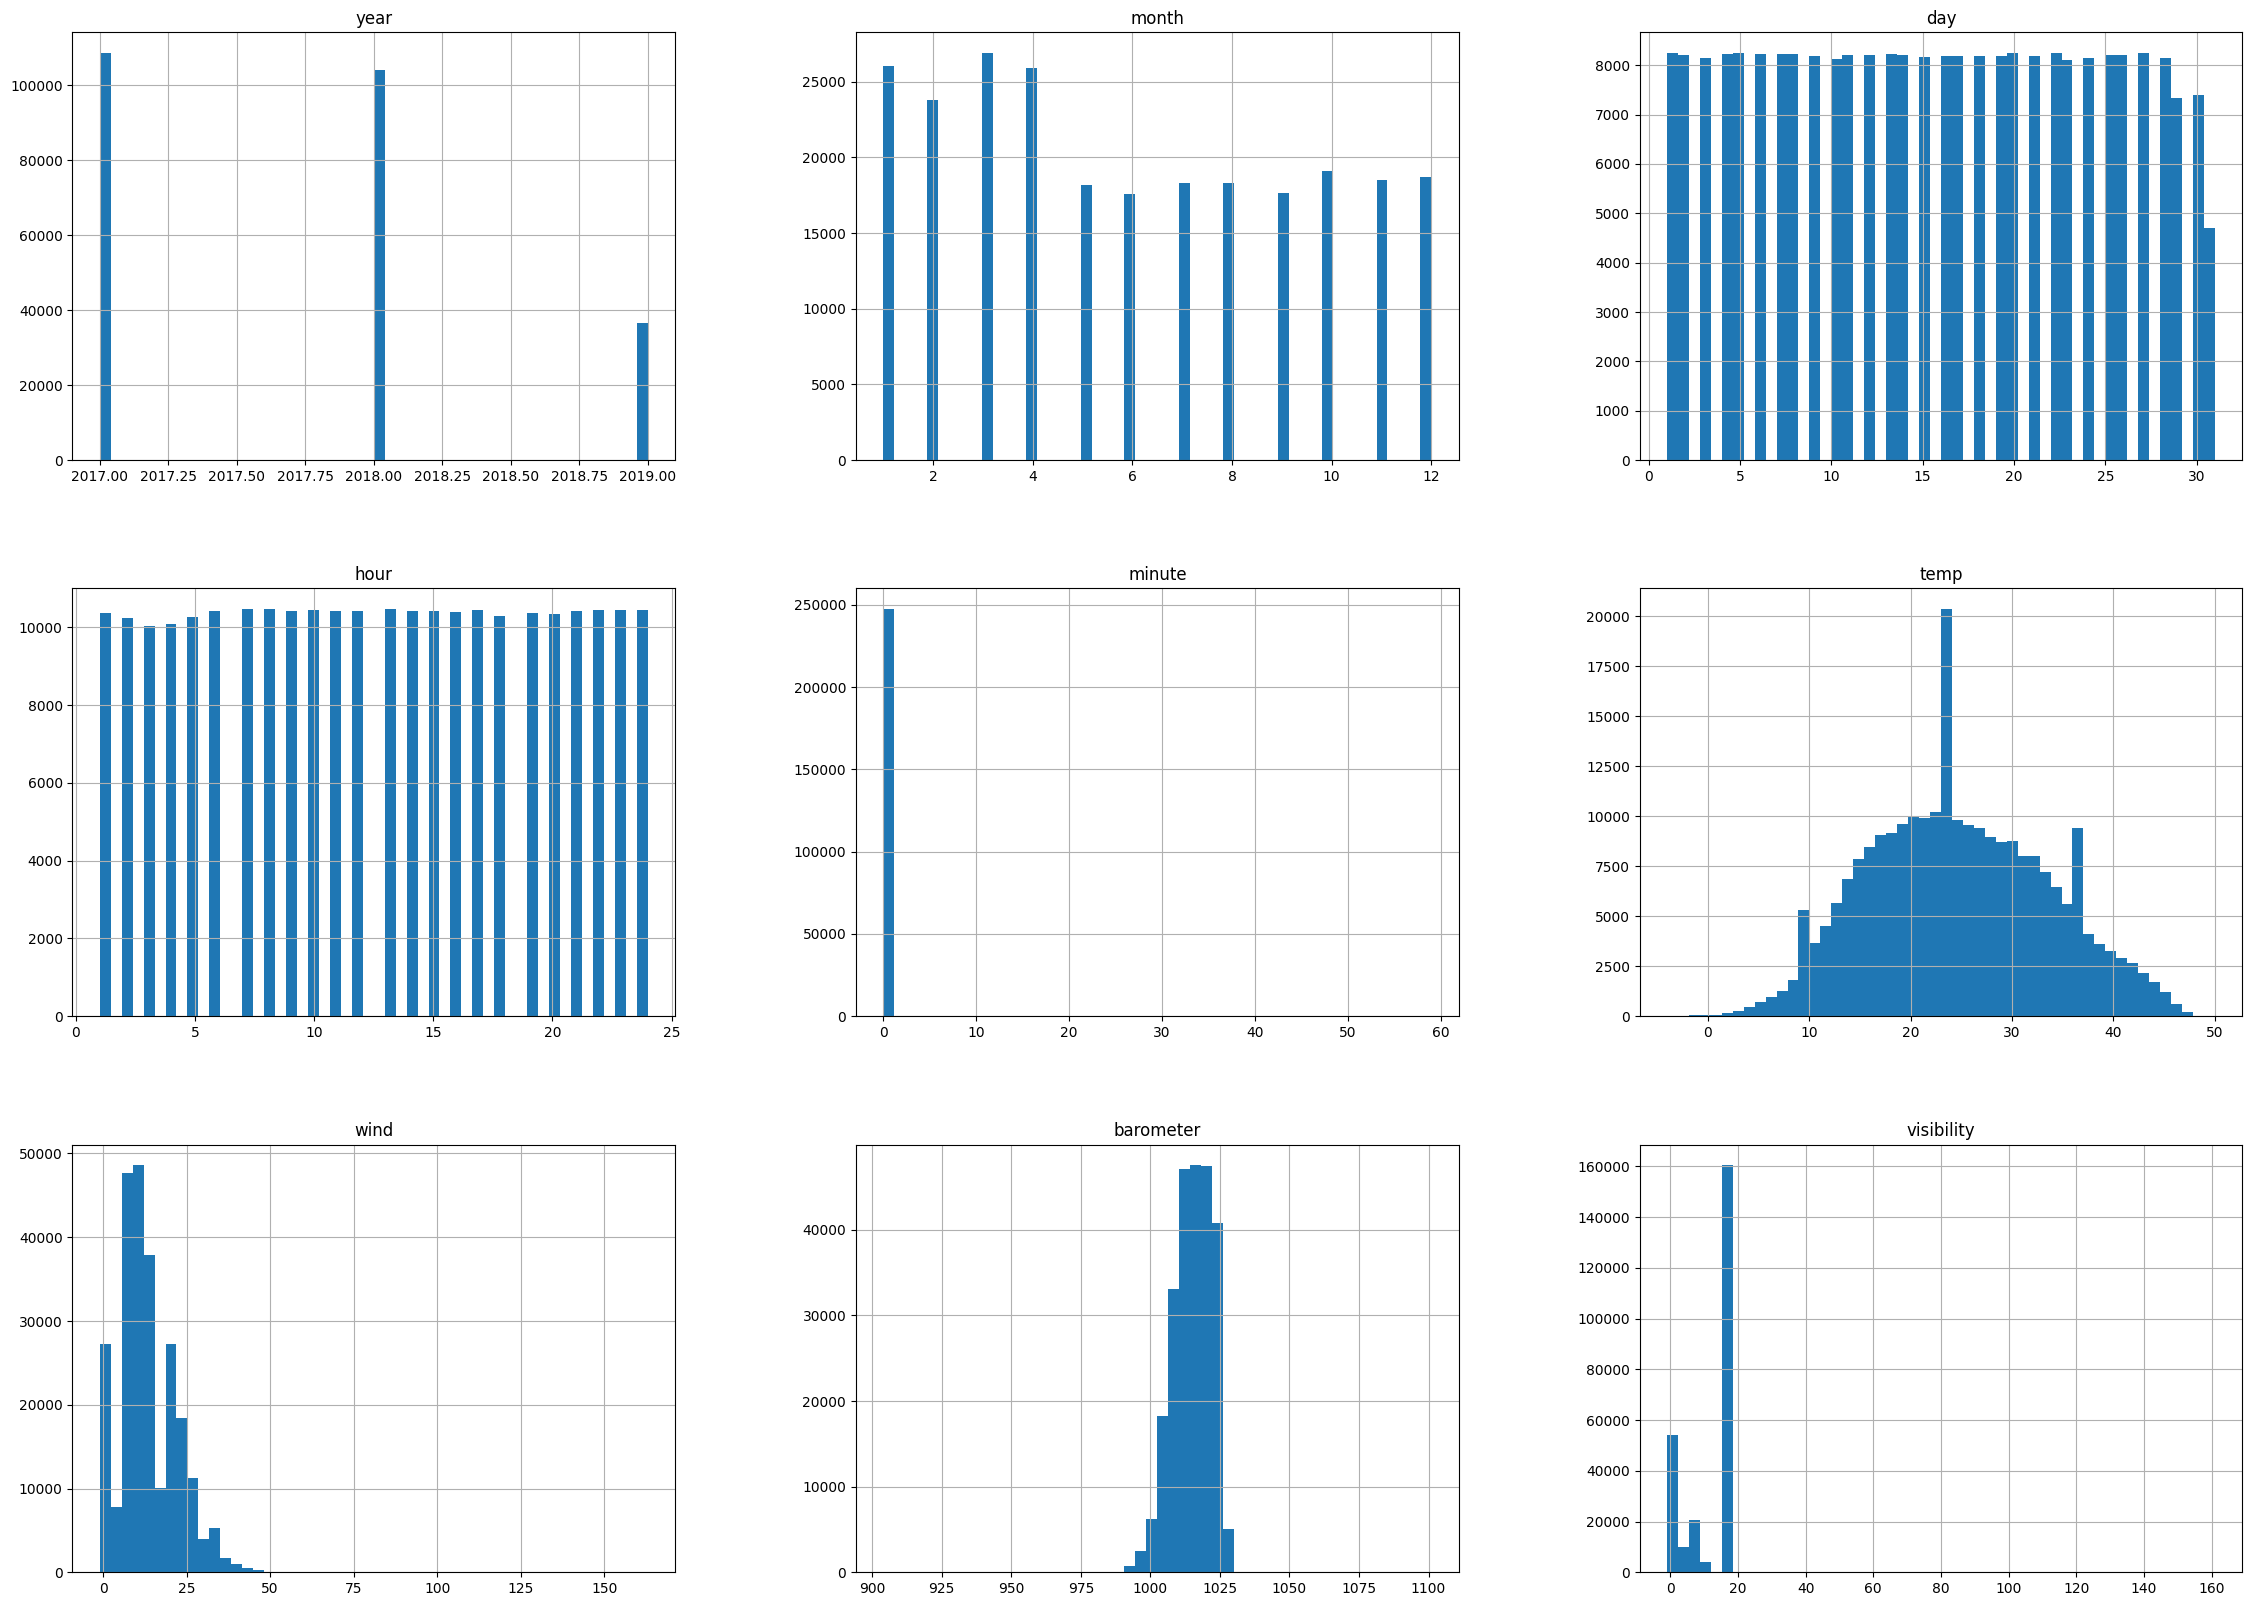

In [ ]:
data.hist(bins=50, figsize=(28,20))
plt.show()

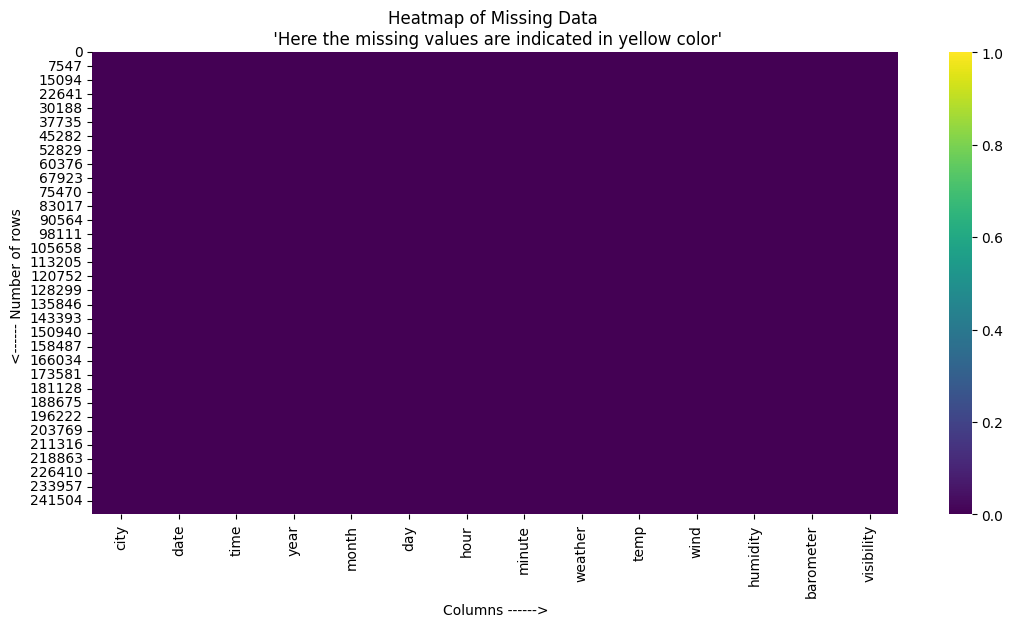

In [ ]:
import seaborn as sns
missing_data_mask = data.isnull()

# Create a heatmap using seaborn to visualize missing data
plt.figure(figsize=(13, 6))  # Optional: Adjust the figure size
sns.heatmap(missing_data_mask, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Data \n \'Here the missing values are indicated in yellow color\'')
plt.xlabel('Columns ------>')
plt.ylabel('<------ Number of rows ')
plt.show()

In [ ]:
data = data.drop_duplicates()
missing_values_count = data.isnull().sum()
print(missing_values_count)

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64


<ipython-input-8-225c859fef6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


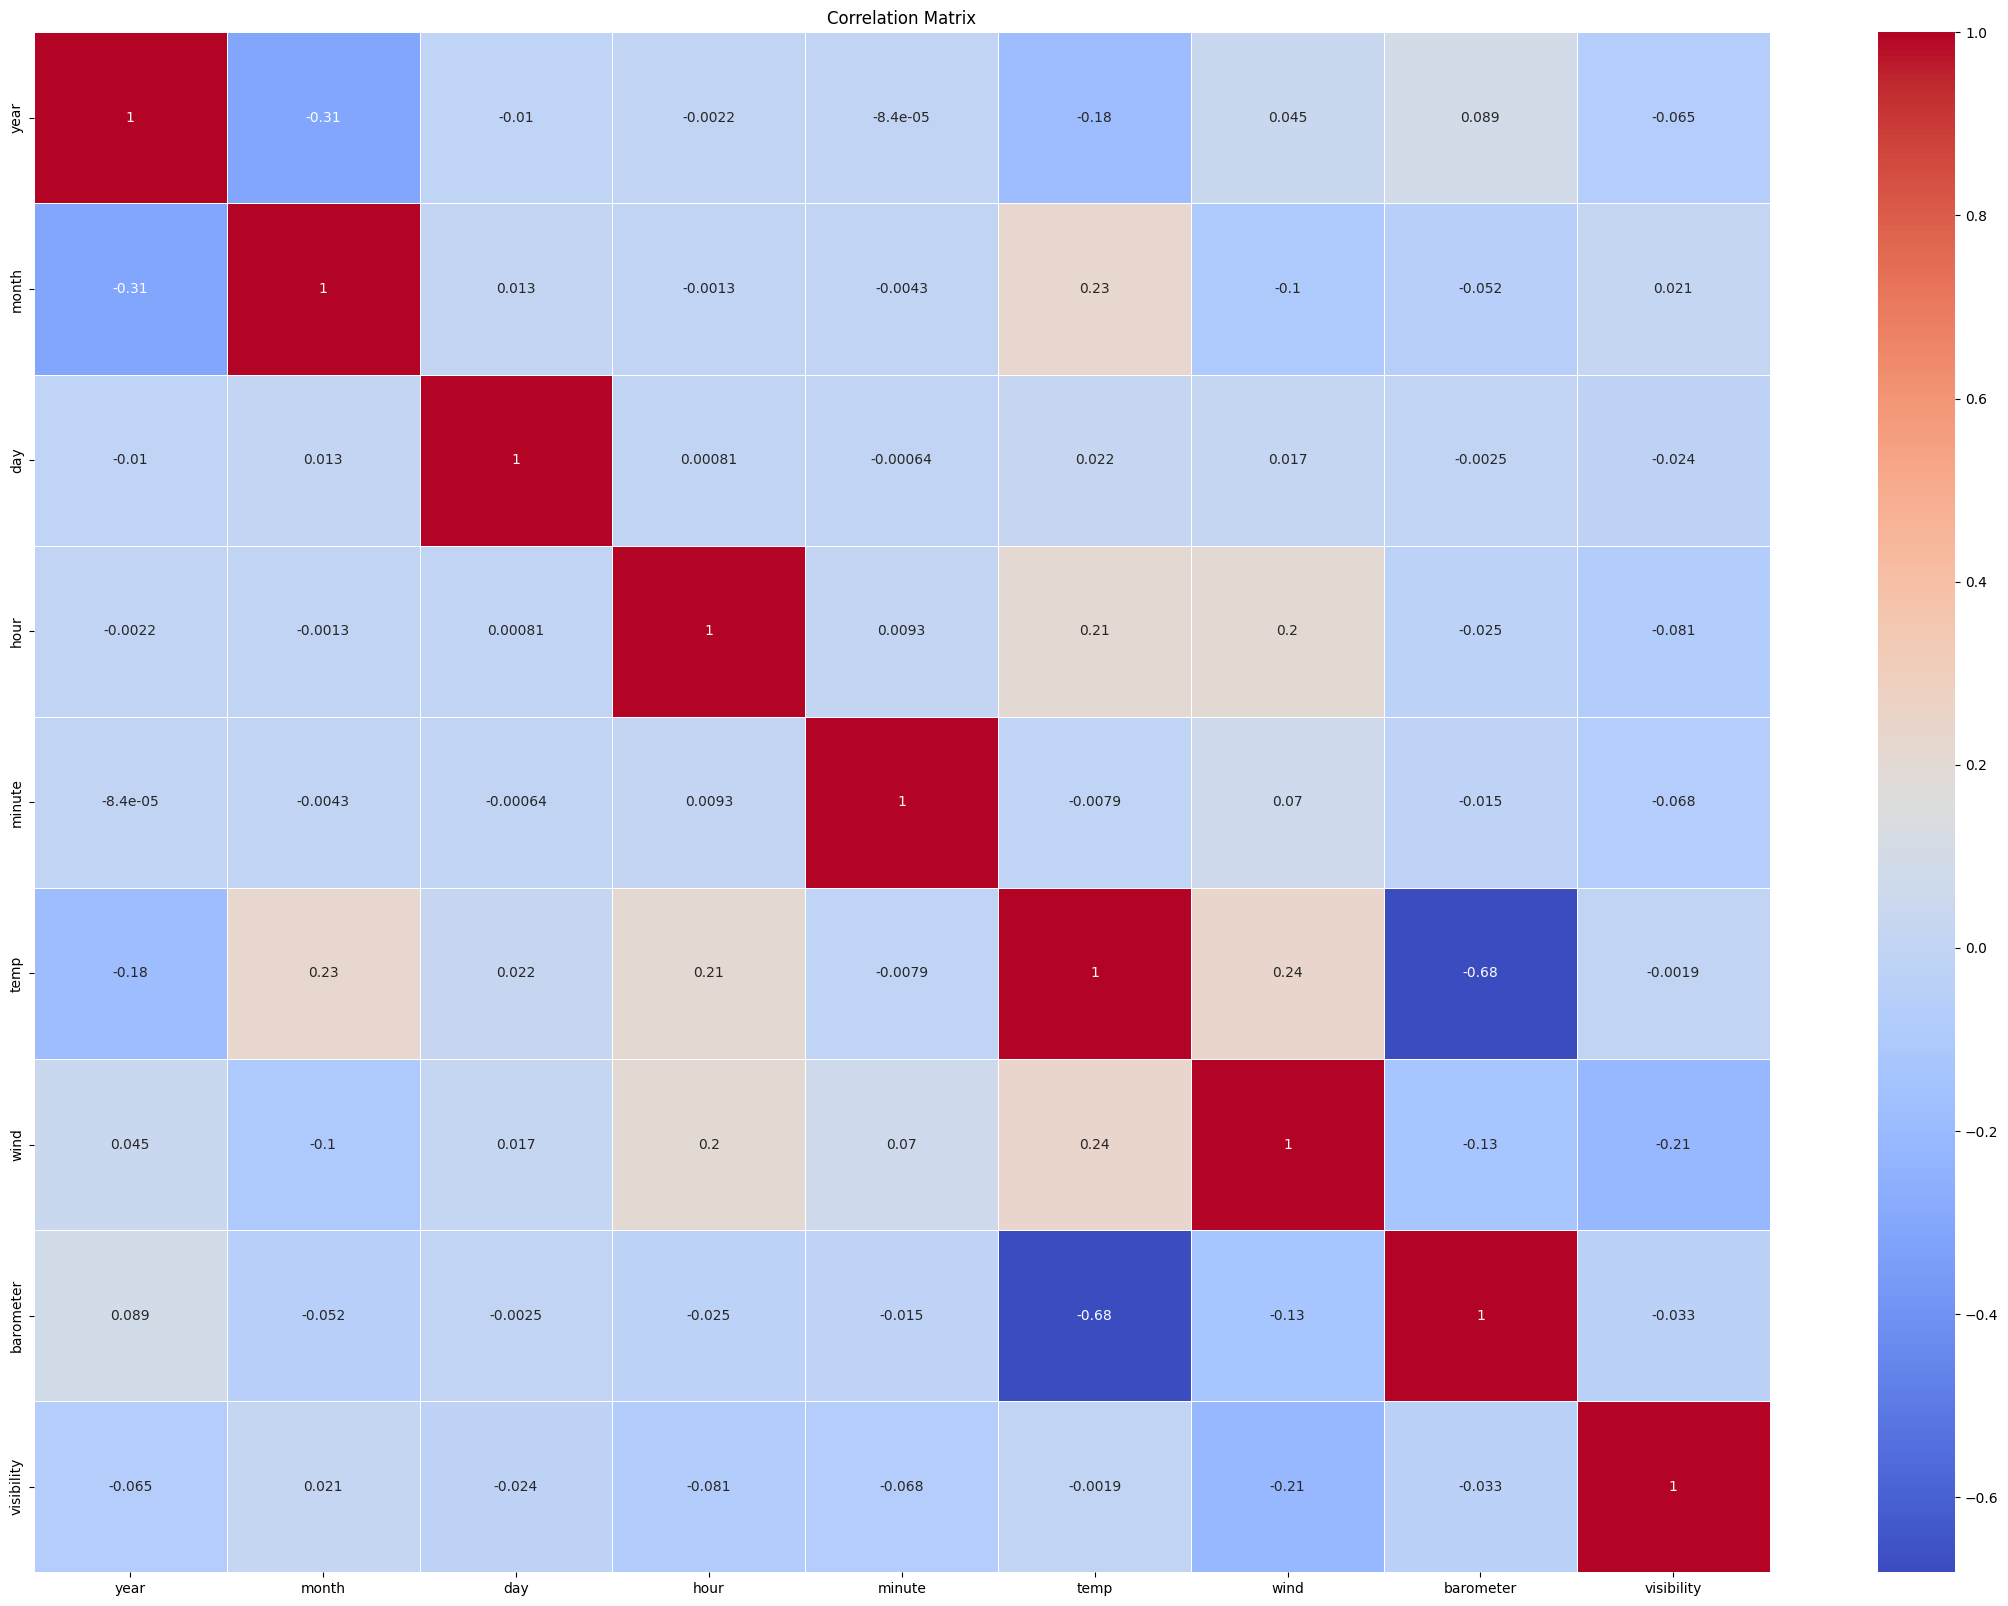

In [ ]:
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(28, 20))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['city','weather'], drop_first=True)
data['humidity'] = data['humidity'].str.replace('%', '').astype(float)

In [ ]:
data.columns

Index(['date', 'time', 'year', 'month', 'day', 'hour', 'minute', 'temp',
       'wind', 'humidity',
       ...
       'weather_Thunderstorms  Fog ',
       'weather_Thunderstorms  More clouds than sun ',
       'weather_Thunderstorms  Mostly cloudy ',
       'weather_Thunderstorms  Overcast ',
       'weather_Thunderstorms  Partly cloudy ',
       'weather_Thunderstorms  Partly sunny ',
       'weather_Thunderstorms  Passing clouds ',
       'weather_Thunderstorms  Sandstorm ',
       'weather_Thunderstorms  Scattered clouds ', 'weather_Warm '],
      dtype='object', length=104)

In [ ]:
'''# Assuming you have a DataFrame named data with a 'date' column
data['hour'] = data['time'].dt.hour
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek'''
# Drop the original 'time' column
data.drop(columns=['date','time'], inplace=True)
print(data.dtypes)

year                                        int64
month                                       int64
day                                         int64
hour                                        int64
minute                                      int64
                                            ...  
weather_Thunderstorms  Partly sunny         uint8
weather_Thunderstorms  Passing clouds       uint8
weather_Thunderstorms  Sandstorm            uint8
weather_Thunderstorms  Scattered clouds     uint8
weather_Warm                                uint8
Length: 102, dtype: object


In [ ]:
# Assuming you have a DataFrame named data with features and target 'temp'
y = data['temp']
X = data.drop(['temp'], axis=1)

In [ ]:
'''# Create box plots for each feature across different categories
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    data_box = pd.concat([X[feature], y], axis=1)
    data_box.columns = [feature, 'Category']
    data_box.boxplot(by='Category', vert=False)
    plt.title(f'Boxplot of {feature} across Categories')
    plt.xlabel(feature)
    plt.ylabel('Category')
    plt.show()'''

"# Create box plots for each feature across different categories\nfor feature in X.columns:\n    plt.figure(figsize=(10, 6))\n    data_box = pd.concat([X[feature], y], axis=1)\n    data_box.columns = [feature, 'Category']\n    data_box.boxplot(by='Category', vert=False)\n    plt.title(f'Boxplot of {feature} across Categories')\n    plt.xlabel(feature)\n    plt.ylabel('Category')\n    plt.show()"

In [ ]:
from scipy.stats.mstats import winsorize
# Winsorize features to handle outliers
X = X.apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

In [ ]:
'''from scipy.stats.mstats import winsorize
# Create box plots for each feature across different categories
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    data_box = pd.concat([X[feature], y], axis=1)
    data_box.columns = [feature, 'Category']
    data_box.boxplot(by='Category', vert=False)
    plt.title(f'Boxplot of {feature} across Categories')
    plt.xlabel(feature)
    plt.ylabel('Category')
    plt.show()'''

"from scipy.stats.mstats import winsorize\n# Create box plots for each feature across different categories\nfor feature in X.columns:\n    plt.figure(figsize=(10, 6))\n    data_box = pd.concat([X[feature], y], axis=1)\n    data_box.columns = [feature, 'Category']\n    data_box.boxplot(by='Category', vert=False)\n    plt.title(f'Boxplot of {feature} across Categories')\n    plt.xlabel(feature)\n    plt.ylabel('Category')\n    plt.show()"

In [ ]:
from sklearn.impute import SimpleImputer
# Instantiate imputer with desired strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')
# Fit and transform the data
X = imputer.fit_transform(X)

#3. Data Analysis

Creating dummy variables for categorical features using pd.get_dummies().

Preprocessing the 'humidity' column by converting percentage values to floats.

Splitting the data into training and testing sets using train_test_split().

Defining a list of machine learning models and their hyperparameters.

Looping through the models, fitting them on the training data, making predictions, and calculating RMSE, MSE, and MAE metrics for each model.

Displaying bar plots showing the metrics for each model's performance.

Selecting the top-performing models based on RMSE scores for ensemble modeling.




stacking regressor:

Initializes a stacking regressor with selected base models and a final estimator.

Fits the stacking ensemble on the training data.

Predicts the target values using the stacking ensemble.

Calculates RMSE, MSE, and MAE metrics for the stacking ensemble.

Displays bar plots showing the metrics for the stacking ensemble's performance.

In [ ]:
# Split the labeled data into 70% and unlabeled data into 30% initially
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=10, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                    n_estimators=10, random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42))
]

Random Forest RMSE: 1.2692, MSE: 1.6109, MAE: 0.8667


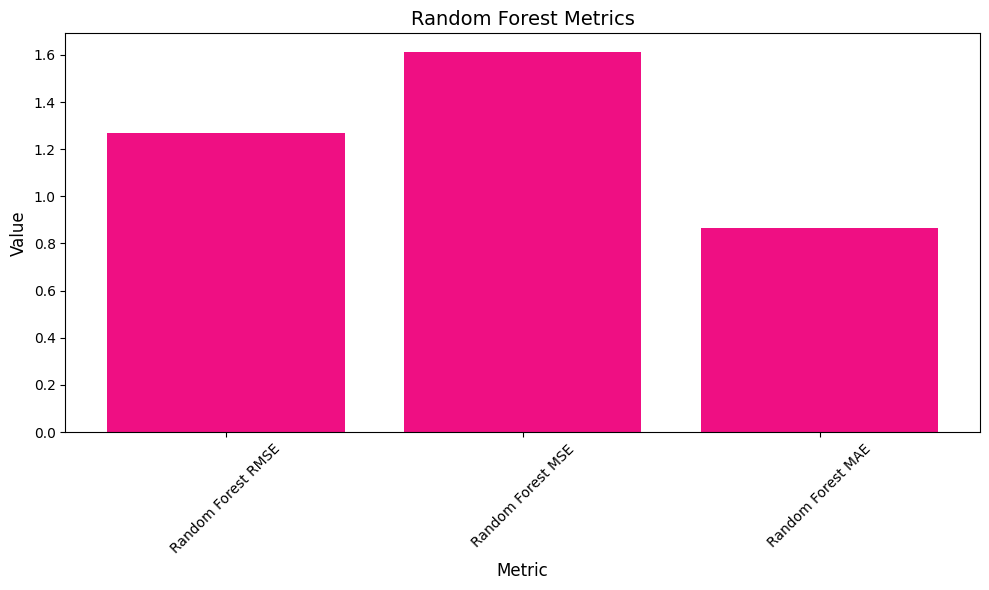

Extra Trees RMSE: 1.1639, MSE: 1.3547, MAE: 0.7525


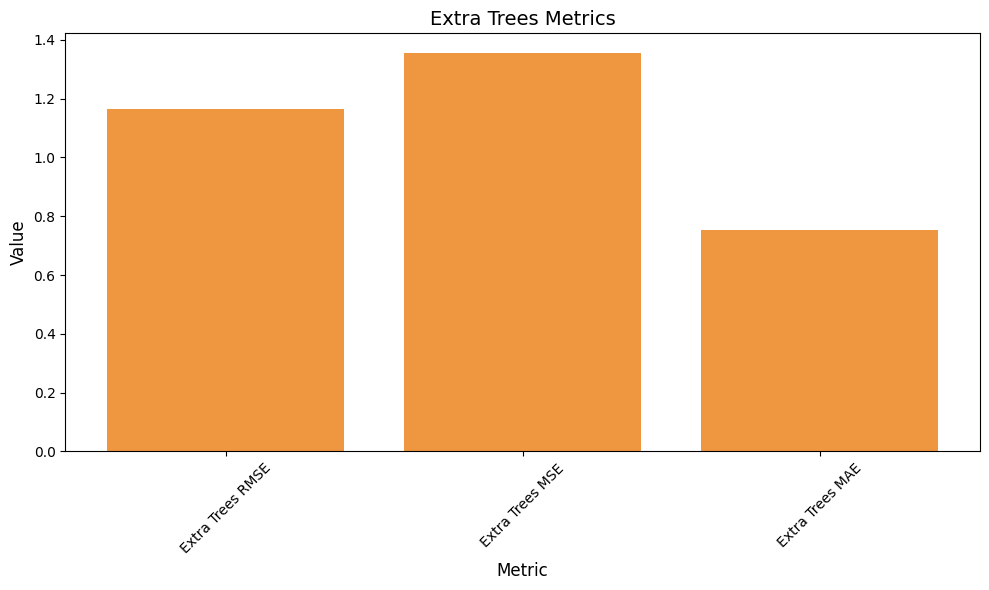

Gradient Boosting RMSE: 2.4697, MSE: 6.0992, MAE: 1.9276


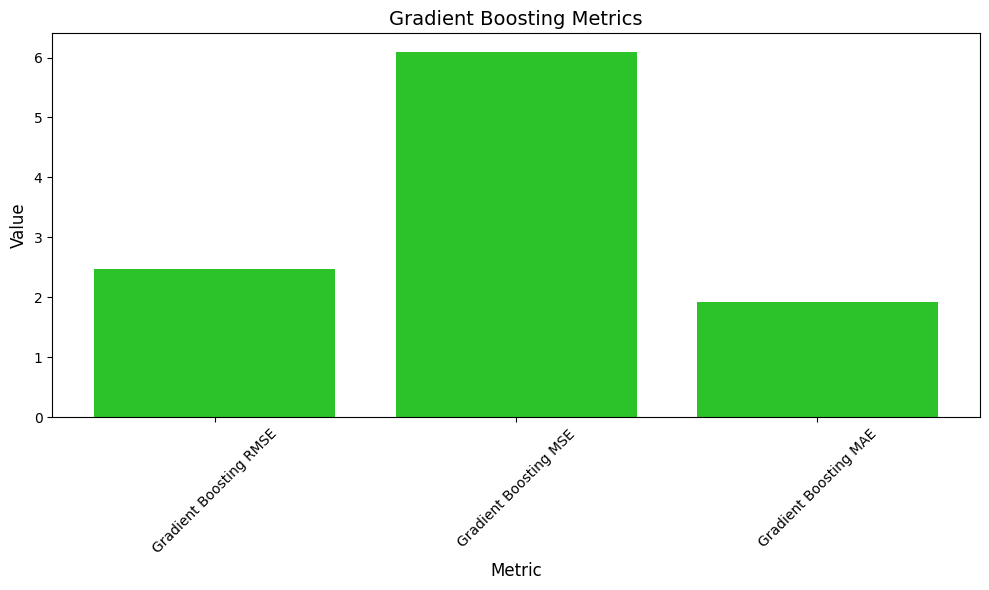

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost RMSE: 1.2356, MSE: 1.5266, MAE: 0.7218


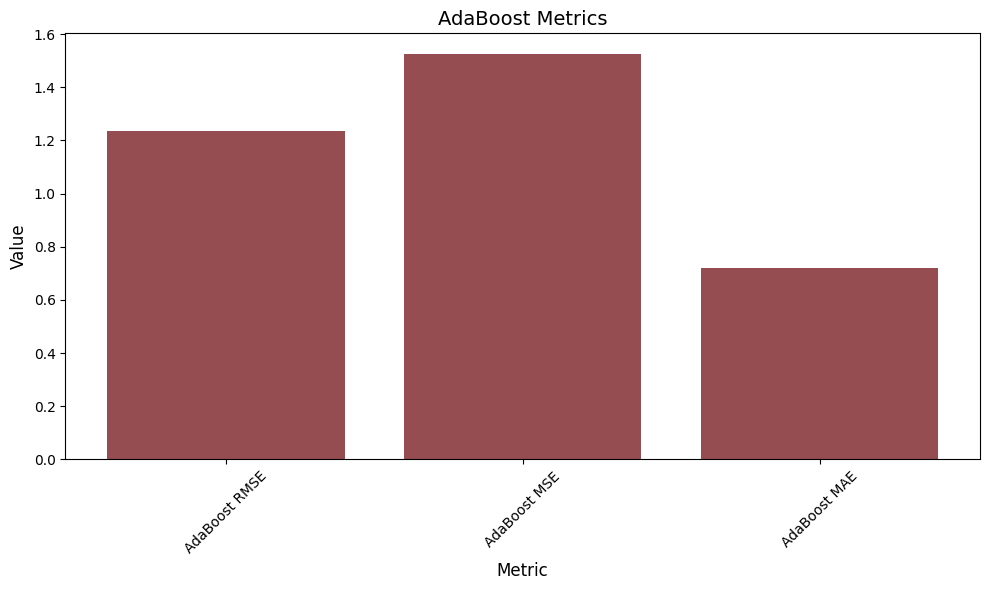

Linear Regression RMSE: 3.9478, MSE: 15.5848, MAE: 3.1065


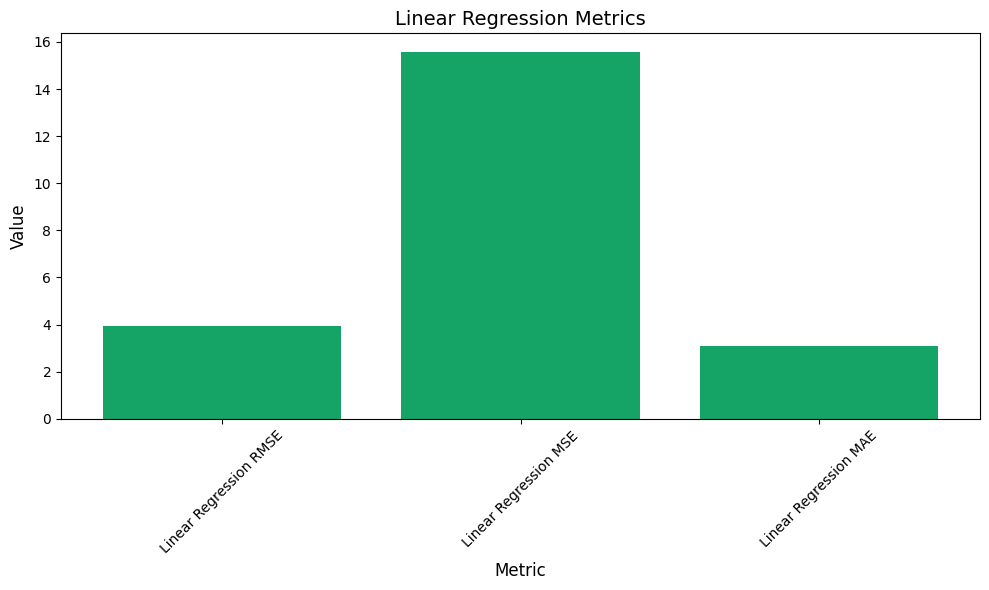

Ridge Regression RMSE: 3.9478, MSE: 15.5848, MAE: 3.1065


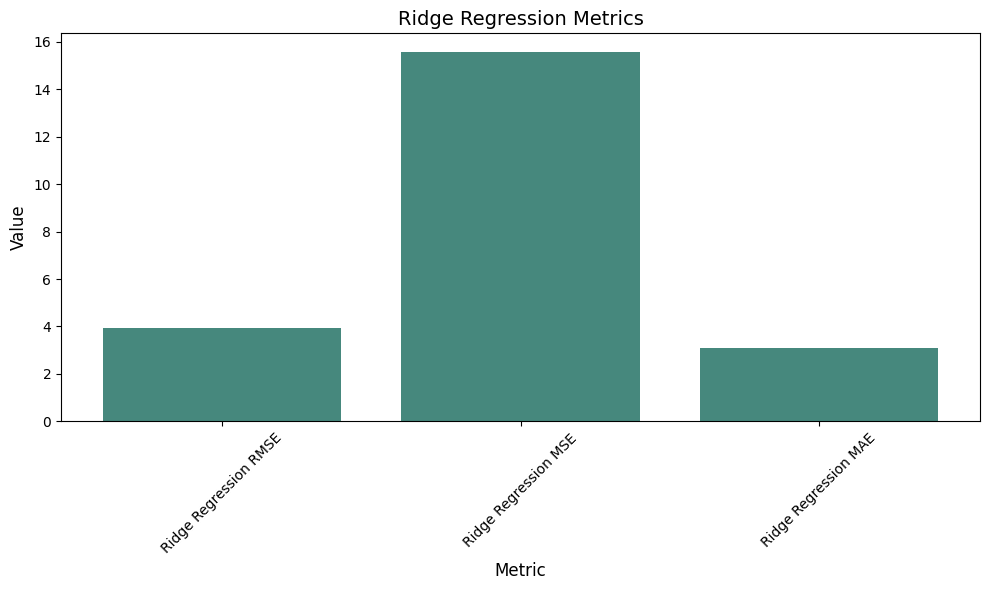

Lasso Regression RMSE: 4.8992, MSE: 24.0026, MAE: 3.9132


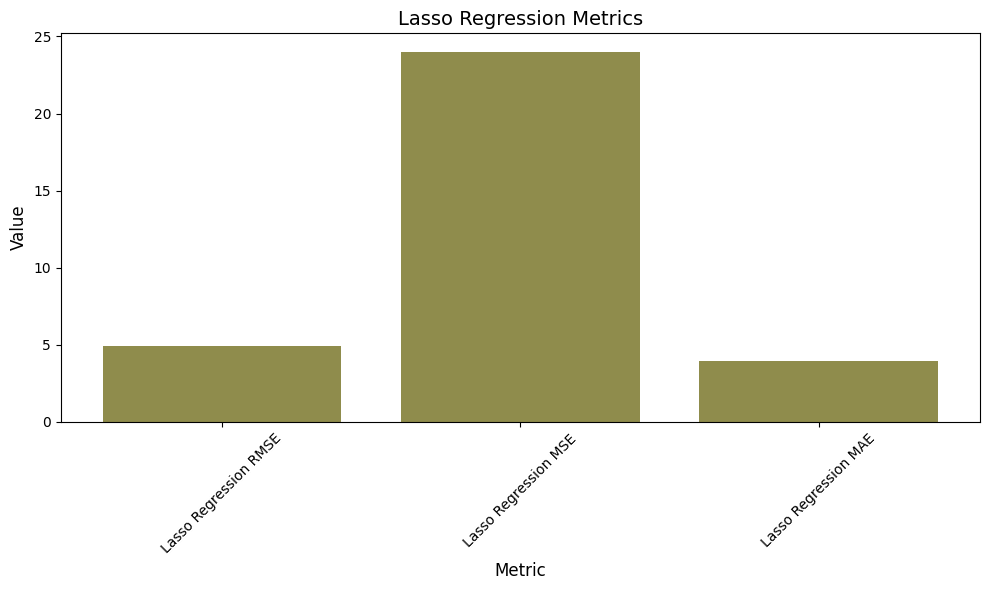

Decision Tree RMSE: 1.6698, MSE: 2.7882, MAE: 0.9537


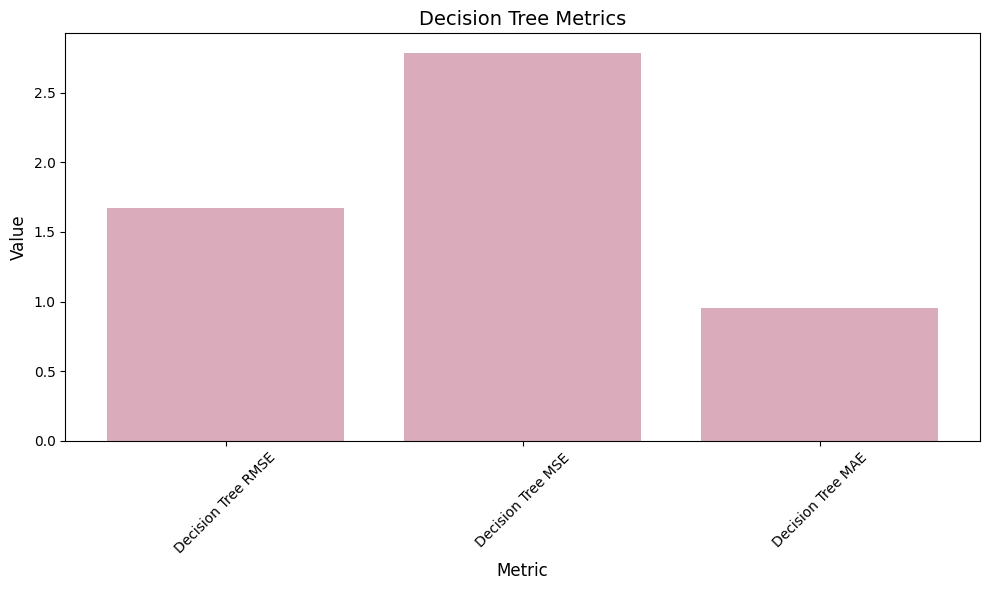

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Lists to store model names and metrics for visualization
model_names = []
rmse_scores = []
mse_scores = []
mae_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

    # Append model name and metrics for visualization
    model_names.append(name)
    rmse_scores.append(rmse)
    mse_scores.append(mse)
    mae_scores.append(mae)

    # Create a colorful bar plot for each model's metrics
    plt.figure(figsize=(10, 6))
    plt.bar([f"{name} RMSE", f"{name} MSE", f"{name} MAE"], [rmse, mse, mae], color=np.random.rand(3, ))
    plt.title(f"{name} Metrics", fontsize=14)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
# Select the top 5 performing models for ensemble
top_models = sorted(zip(model_names, rmse_scores), key=lambda x: x[1])[:4]
top_model_names = [model for model, _ in top_models]
print(top_model_names)

['Extra Trees', 'AdaBoost', 'Random Forest', 'Decision Tree']


In [ ]:
import warnings
from sklearn.ensemble import StackingRegressor
warnings.filterwarnings("ignore", message="X has feature names, but .* was fitted without feature names", category=UserWarning)
# Initialize the StackingRegressor with the top models
stacking_regressor = StackingRegressor(estimators=[
    ('Random Forest', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=10, random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                    n_estimators=10, random_state=42),)

], final_estimator=LinearRegression())

# Fit the stacking ensemble on the training data
stacking_regressor.fit(X_train, y_train)

# Predict the final output using the stacking ensemble
final_predictions = stacking_regressor.predict(X_test)

# Calculate metrics for the stacking ensemble
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_mse = mean_squared_error(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)

print(f"Stacking Ensemble RMSE: {final_rmse:.4f}, MSE: {final_mse:.4f}, MAE: {final_mae:.4f}")
warnings.resetwarnings()

Stacking Ensemble RMSE: 1.0736, MSE: 1.1526, MAE: 0.7005


#Results

Displays a bar plot showing RMSE scores of individual models on the validation set.

Creates a scatter plot to compare actual values and predicted values.

Generates a residual plot to analyze the residuals (differences between actual and predicted values).

Plots a scatter plot with a line of best fit to compare actual and predicted values.

Creates a bar plot with error bars to display performance metrics for the stacking ensemble.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


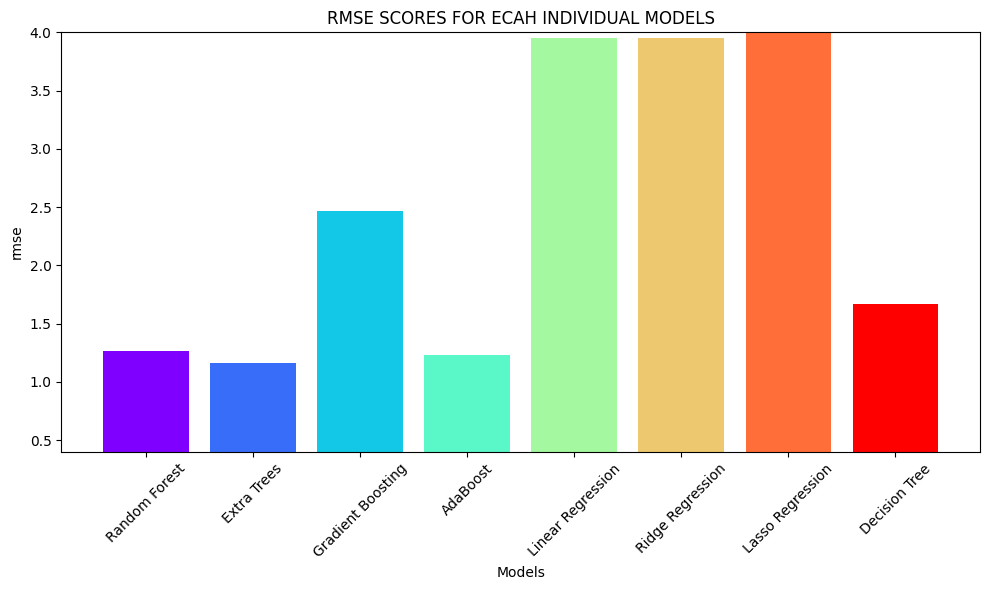

In [ ]:
# Create a bar plot to visualize model accuracies on the validation set
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_names)))
plt.bar(model_names, rmse_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('rmse')
plt.title('RMSE SCORES FOR ECAH INDIVIDUAL MODELS')
plt.xticks(rotation=45)
plt.ylim(0.4, 4)
plt.tight_layout()
plt.show()

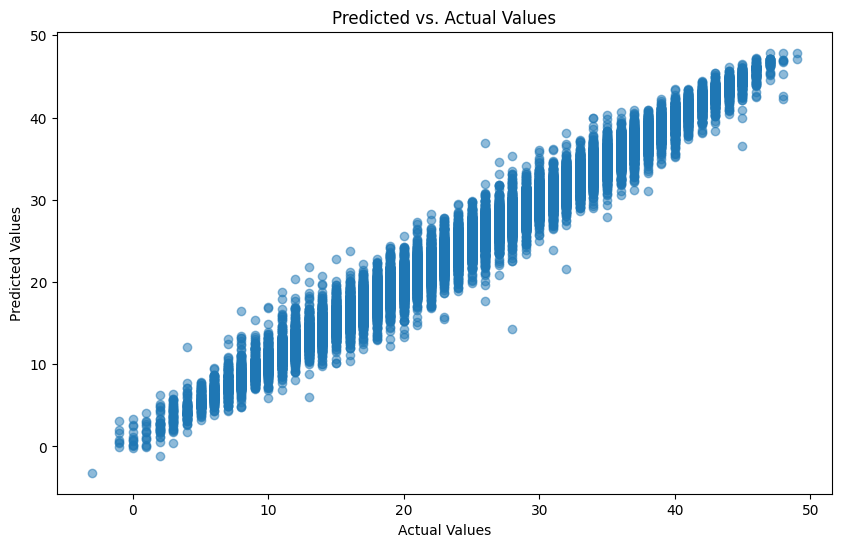

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()


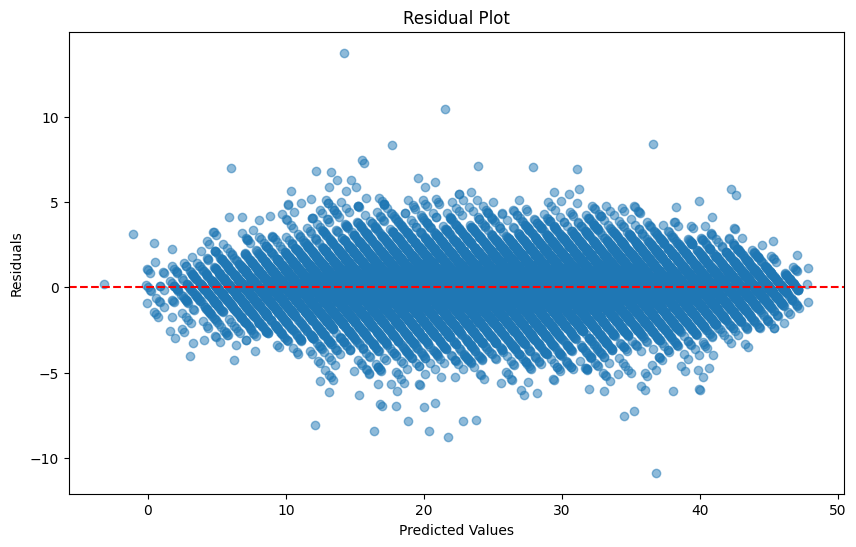

In [ ]:
residuals = y_test - final_predictions
plt.figure(figsize=(10, 6))
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


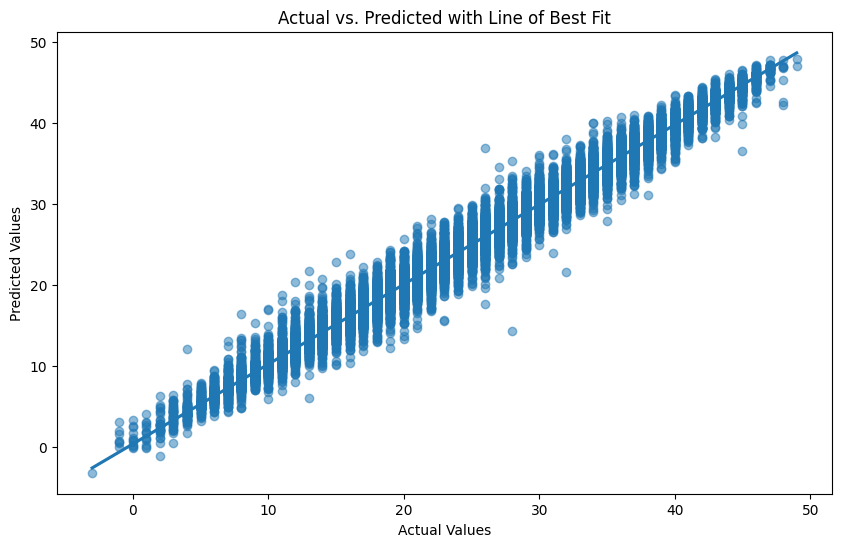

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=final_predictions, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted with Line of Best Fit')
plt.show()


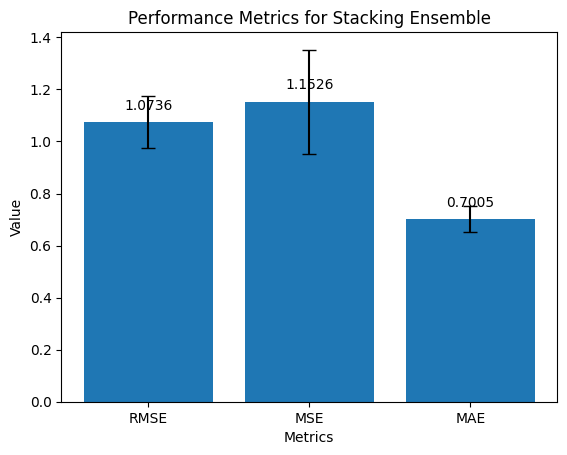

In [ ]:
# Create a bar plot with details and error bars
metrics_names = ['RMSE', 'MSE', 'MAE']
metrics_values = [final_rmse, final_mse, final_mae]
metrics_errors = [0.1, 0.2, 0.05]  # Example error values

plt.bar(metrics_names, metrics_values, yerr=metrics_errors, capsize=5)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Stacking Ensemble')

# Display the actual values on top of the bars
for i, value in enumerate(metrics_values):
    plt.text(i, value + 0.05, f'{value:.4f}', ha='center')

plt.show()

In [ ]:
column_names = ['year', 'month', 'day', 'hour', 'minute', 'wind', 'humidity',
       'barometer', 'visibility', 'city_Baha', 'city_EP',
       'city_Hail', 'city_Jawf', 'city_Jazan', 'city_Madina', 'city_Mecca',
       'city_Najran', 'city_Northern boarder', 'city_Qassim', 'city_Riyadh',
       'city_Tabuk', 'weather_Clear ', 'weather_Cloudy ', 'weather_Cool ',
       'weather_Dense fog ', 'weather_Drizzle  Broken clouds ',
       'weather_Drizzle  Dense fog ', 'weather_Drizzle  Fog ',
       'weather_Drizzle  More clouds than sun ',
       'weather_Drizzle  Mostly cloudy ', 'weather_Drizzle  Overcast ',
       'weather_Drizzle  Partly sunny ', 'weather_Duststorm ',
       'weather_Extremely hot ', 'weather_Fog ', 'weather_Hail  Cloudy ',
       'weather_Hail  Partly sunny ', 'weather_Hail  Passing clouds ',
       'weather_Haze ', 'weather_Heavy rain  More clouds than sun ',
       'weather_Heavy rain  Mostly cloudy ', 'weather_Heavy rain  Overcast ',
       'weather_Heavy rain  Partly sunny ', 'weather_Hot ',
       'weather_Light rain  Broken clouds ', 'weather_Light rain  Fog ',
       'weather_Light rain  More clouds than sun ',
       'weather_Light rain  Mostly cloudy ', 'weather_Light rain  Overcast ',
       'weather_Light rain  Partly cloudy ',
       'weather_Light rain  Partly sunny ',
       'weather_Light rain  Passing clouds ',
       'weather_Light rain  Scattered clouds ', 'weather_Low level haze ',
       'weather_Mild ', 'weather_More clouds than sun ',
       'weather_Mostly cloudy ', 'weather_Overcast ', 'weather_Partly cloudy ',
       'weather_Partly sunny ', 'weather_Passing clouds ',
       'weather_Pleasantly warm ', 'weather_Rain  Broken clouds ',
       'weather_Rain  Clear ', 'weather_Rain  Fog ',
       'weather_Rain  More clouds than sun ', 'weather_Rain  Mostly cloudy ',
       'weather_Rain  Overcast ', 'weather_Rain  Partly cloudy ',
       'weather_Rain  Partly sunny ', 'weather_Rain  Passing clouds ',
       'weather_Rain  Sandstorm ', 'weather_Rain  Scattered clouds ',
       'weather_Rain showers  Partly sunny ', 'weather_Refreshingly cool ',
       'weather_Sandstorm ', 'weather_Scattered clouds ', 'weather_Smoke ',
       'weather_Sprinkles  Cloudy ', 'weather_Sprinkles  Duststorm ',
       'weather_Sprinkles  Low level haze ', 'weather_Sprinkles  Overcast ',
       'weather_Strong thunderstorms  Cloudy ',
       'weather_Strong thunderstorms  More clouds than sun ',
       'weather_Strong thunderstorms  Partly sunny ', 'weather_Sunny ',
       'weather_Thundershowers  Partly sunny ',
       'weather_Thundershowers  Passing clouds ',
       'weather_Thundershowers  Scattered clouds ',
       'weather_Thunderstorms  Broken clouds ',
       'weather_Thunderstorms  Cloudy ', 'weather_Thunderstorms  Fog ',
       'weather_Thunderstorms  More clouds than sun ',
       'weather_Thunderstorms  Mostly cloudy ',
       'weather_Thunderstorms  Overcast ',
       'weather_Thunderstorms  Partly cloudy ',
       'weather_Thunderstorms  Partly sunny ',
       'weather_Thunderstorms  Passing clouds ',
       'weather_Thunderstorms  Sandstorm ',
       'weather_Thunderstorms  Scattered clouds ', 'weather_Warm ']
data_o = pd.DataFrame(columns=column_names)

In [ ]:
print(data_o)
import warnings
with warnings.catch_warnings():
   warnings.simplefilter("ignore", category=UserWarning)

Empty DataFrame
Columns: [year, month, day, hour, minute, wind, humidity, barometer, visibility, city_Baha, city_EP, city_Hail, city_Jawf, city_Jazan, city_Madina, city_Mecca, city_Najran, city_Northern boarder, city_Qassim, city_Riyadh, city_Tabuk, weather_Clear , weather_Cloudy , weather_Cool , weather_Dense fog , weather_Drizzle  Broken clouds , weather_Drizzle  Dense fog , weather_Drizzle  Fog , weather_Drizzle  More clouds than sun , weather_Drizzle  Mostly cloudy , weather_Drizzle  Overcast , weather_Drizzle  Partly sunny , weather_Duststorm , weather_Extremely hot , weather_Fog , weather_Hail  Cloudy , weather_Hail  Partly sunny , weather_Hail  Passing clouds , weather_Haze , weather_Heavy rain  More clouds than sun , weather_Heavy rain  Mostly cloudy , weather_Heavy rain  Overcast , weather_Heavy rain  Partly sunny , weather_Hot , weather_Light rain  Broken clouds , weather_Light rain  Fog , weather_Light rain  More clouds than sun , weather_Light rain  Mostly cloudy , weather_

In [ ]:
from re import M
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

city_dropdown = widgets.Dropdown(
    options=['Qassim', 'Hail', 'Madina', 'EP', 'Riyadh', 'Mecca', 'Tabuk', 'Assir', 'Northern boarder', 'Jazan', 'Najran', 'Baha', 'Jawf'],
    description='City:'
)
weather_type_dropdown = widgets.Dropdown(
    options=['Clear', 'Sunny', 'Haze', 'Passing clouds', 'Broken clouds', 'Partly sunny', 'Scattered clouds', 'Fog', 'Partly cloudy', 'Refreshingly cool', 'Low level haze', 'Rain Passing clouds', 'More clouds than sun', 'Light rain Partly cloudy', 'Light rain Mostly cloudy', 'Drizzle Mostly cloudy', 'Rain Partly cloudy', 'Mostly cloudy', 'Duststorm', 'Rain Partly sunny', 'Sandstorm', 'Overcast', 'Drizzle Partly sunny', 'Rain Broken clouds', 'Light rain Broken clouds', 'Drizzle Fog', 'Thunderstorms Passing clouds', 'Thunderstorms Mostly cloudy', 'Light rain More clouds than sun', 'Thunderstorms Partly cloudy', 'Thunderstorms Fog', 'Rain Mostly cloudy', 'Rain More clouds than sun', 'Thunderstorms Partly sunny', 'Thunderstorms More clouds than sun', 'Thunderstorms Scattered clouds', 'Heavy rain Mostly cloudy', 'Drizzle Broken clouds', 'Heavy rain More clouds than sun', 'Light rain Fog', 'Strong thunderstorms More clouds than sun', 'Light rain Partly sunny', 'Light rain Passing clouds', 'Cool', 'Thunderstorms Broken clouds', 'Rain Scattered clouds', 'Drizzle More clouds than sun', 'Dense fog', 'Thunderstorms Overcast', 'Pleasantly warm', 'Extremely hot', 'Mild', 'Warm', 'Thunderstorms Sandstorm', 'Sprinkles Cloudy', 'Sprinkles Overcast', 'Sprinkles Duststorm', 'Rain showers Partly sunny', 'Hot', 'Smoke', 'Thunderstorms Cloudy', 'Rain Overcast', 'Rain Sandstorm', 'Rain Fog', 'Drizzle Overcast', 'Light rain Overcast', 'Heavy rain Partly sunny', 'Heavy rain Overcast', 'Light rain Scattered clouds', 'Cloudy', 'Rain Clear', 'Thundershowers Passing clouds', 'Hail Passing clouds', 'Thundershowers Scattered clouds', 'Sprinkles Low level haze', 'Strong thunderstorms Partly sunny', 'Thundershowers Partly sunny', 'Hail Partly sunny', 'Strong thunderstorms Cloudy', 'Hail Cloudy', 'Drizzle Dense fog'],
    description='Weather Type:'
)

hour_slider = widgets.IntSlider(
    value=12,
    min=0,
    max=24,
    step=1,
    description='Hour')

wind_slider = widgets.IntSlider(
    value=50,
    min=-1,
    max=163,
    step=1,
    description='Wind:'
)

barometer_slider = widgets.IntSlider(
    value=1000,
    min=904,
    max=1101,
    step=1,
    description='Barometer:'
)

visibility_slider = widgets.IntSlider(
    value=80,
    min=-1,
    max=161,
    step=1,
    description='Visibility:'
)

humidity_slider = widgets.IntSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Humidity:'
)

date_picker = widgets.DatePicker(
    description='Date:'
)



button = widgets.Button(
    description='Get Weather'
)

output = widgets.Output()

def on_button_click(b):
    with output:
        global data_o
        new_row = {
            'date': date_picker.value.strftime('%Y-%m-%d'),
            'hour': int(hour_slider.value),
            'city': city_dropdown.value,
            'wind': int(wind_slider.value),
            'barometer': int(barometer_slider.value),
            'weather' : weather_type_dropdown,
            'visibility': int(visibility_slider.value),
            'humidity': int(humidity_slider.value)
        }
        data_o = data_o.append(new_row, ignore_index=True)
        k = 'city_' + data_o['city'].astype(str)
        data_o[k] = 1
        m = 'weather_' + data_o['weather'].astype(str)
        data_o[m] = 1
        # Convert 'date' column to datetime if it's not already
        data_o['date'] = pd.to_datetime(data_o['date'])
        # Extract 'month' and 'year' from the 'date' column
        data_o['month'] = data_o['date'].dt.month
        data_o['year'] = data_o['date'].dt.year
        data_o['day'] = data_o['date'].dt.day
        data_o.fillna(0, inplace=True)
        data_o = data_o[column_names]
        X = data_o.drop([], axis=1)
        X = X.apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)
        X = imputer.fit_transform(X)
        final_predictions_o = stacking_regressor.predict(X)
        print("*****The Predicted Tempersture is: *****\n")
        print(final_predictions_o,'\n\n\n\n\n')
        final_predictions_o = None

button.on_click(on_button_click)

widgets.VBox([
    date_picker,
    hour_slider,
    city_dropdown,
    wind_slider,
    barometer_slider,
    visibility_slider,
    humidity_slider,
    button,
    output
])
